# Scikit-HEP Project
* [Scikit-HEP project](https://scikit-hep.org) provides high-performance data analysis tools in Python
* Partially funded by NSF grants
* Many LHCb developers: Eduardo Rodrigues, Chris Burr, Hans Dembinski, ...
* Core values
    * Specialized tools that integrate well into Python ecosystem
    * Easy to use for beginners
    * Flexible for power users
    * Good documentation
    * Easy installation


##  The power of combinatorics

<img src="https://images.unsplash.com/photo-1578211952774-21325799c14d?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1350&q=80" width=50%/>

* Build everything from basic components that fit together

## Important packages

* Python scientific stack
    * [Numpy](https://github.com/numpy/numpy): fast computation with arrays
    * [Scipy](https://github.com/scipy/scipy): integration, statistical distributions, special functions, ...
    * [Matplotlib](https://github.com/matplotlib/matplotlib): scientific plotting
    * [Numba](https://github.com/numba/numba): JIT Compiler for Python (VERY FAST)

* Scikit-HEP Project

    * [uproot](https://github.com/scikit-hep/uproot): fast reading and writing of ROOT Trees
    * [boost-histogram](https://github.com/scikit-hep/boost-histogram): multi-dimensional generalised histograms
    * [particle](https://github.com/scikit-hep/particle): get particle properties from PDG IDs
    * [iminuit](https://github.com/scikit-hep/iminuit): fitting and error computation package
    * [resample](https://github.com/scikit-hep/resample): Easy bootstrapping to compute uncertainty and bias

**Install everything with `pip install LIBRARY`**



In [48]:
#!pip install --upgrade 'numpy<1.22' numba matplotlib uproot boost-histogram iminuit

<img src="https://raw.githubusercontent.com/scikit-hep/uproot/master/docs/source/logo-300px.png" width=15%/>

* uproot provides very fast, efficient, and convenient access to ROOT trees

[<img src="https://raw.githubusercontent.com/scikit-hep/uproot/master/docs/logscales.png" width="60%"/>](https://raw.githubusercontent.com/scikit-hep/uproot/master/docs/logscales.png)

In [2]:
# !pip install uproot awkward
import uproot

print(f"uproot {uproot.__version__}")

uproot 4.2.1


In [3]:
f = uproot.open("example.root")
event = f["event"]
 
event.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
trk_len              | int32_t                  | AsDtype('>i4')
mc_trk_len           | int32_t                  | AsDtype('>i4')
trk_imc              | int32_t[]                | AsJagged(AsDtype('>i4'))
trk_px               | float[]                  | AsJagged(AsDtype('>f4'))
trk_py               | float[]                  | AsJagged(AsDtype('>f4'))
trk_pz               | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_px            | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_py            | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_pz            | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_pid           | int32_t[]                | AsJagged(AsDtype('>i4'))


* Tree represents simulated LHCb events 

* Truth in simulation
    * mc_trk_len: number of true tracks in event
    * mc_trk_px: x-component of true momentum of particle
    * mc_trk_py: y-component of true momentum of particle
    * mc_trk_pz: z-component of true momentum of particle
    * mc_trk_pid: particle ID (identity, π, K, proton, ...)

* Reconstructed simulation
    * trk_len: number reconstructed tracks in event
    * trk_px: x-component of momentum of reconstructed track
    * trk_py: y-component of momentum of reconstructed track
    * trk_pz: z-component of momentum of reconstructed track
    
* Special
    * trk_imc: index of associated true particle or -1

In [4]:
# get branches as arrays
arr = event.arrays(["trk_len", "trk_px", "mc_trk_len", "mc_trk_px"])

trk_len = arr["trk_len"]
trk_px = arr["trk_px"]
mc_trk_len = arr["mc_trk_len"]
mc_trk_px = arr["mc_trk_px"]

In [5]:
trk_len

<Array [6, 7, 2, 6, 7, 7, ... 3, 6, 3, 4, 6, 3] type='1000 * int32'>

**Exercise**: Explore some other arrays from `event`

In [6]:
# do exercise here

* Some branches are 2D (e.g. trk_px)
* First index iterates over events
* Second index iterates over tracks per event

In [7]:
for ievent in range(5):
    print(ievent, trk_len[ievent], trk_px[ievent])

0 6 [-0.979, 0.232, -0.464, 0.629, 0.0287, 0.156]
1 7 [-0.59, 0.102, -0.282, -0.585, 0.0525, -0.249, -0.0836]
2 2 [0.124, 0.309]
3 6 [-0.287, 0.0082, -0.671, -0.933, -0.011, 0.0323]
4 7 [-0.086, -0.101, 0.0523, 0.204, -0.0287, 0.115, 0.0954]


**Exercise**
* Explore `mc_trk_len` and `mc_trk_px`
* What do you notice in comparison to `trk_len` and `trk_px`?

In [8]:
# do exercise here

* Mathematical operators and slicing works on these arrays similar to Numpy


In [9]:
trk_len[:10]

<Array [6, 7, 2, 6, 7, 7, 6, 7, 4, 6] type='10 * int32'>

In [10]:
trk_len > 10

<Array [False, False, False, ... False, False] type='1000 * bool'>

In [11]:
trk_len + 1

<Array [7, 8, 3, 7, 8, 8, ... 4, 7, 4, 5, 7, 4] type='1000 * int32'>

In [12]:
# many numpy functions work, although Array is not a numpy array
import numpy as np

In [13]:
np.exp(trk_len)

<Array [403, 1.1e+03, 7.39, ... 403, 20.1] type='1000 * float64'>

In [14]:
np.sum(trk_len)

5032

In [15]:
f"{np.sum(trk_len == 0)} events with zero tracks"

'5 events with zero tracks'

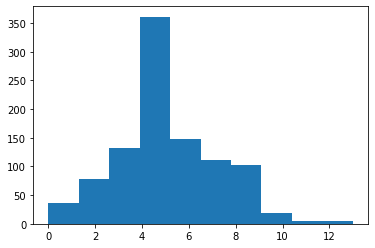

In [16]:
# let's plot some things
import matplotlib.pyplot as plt

plt.hist(trk_len);

**Exercise**
* Try to plot `trk_px`
* Can you figure why it does not work?
* It is possible to fix the issue with the function `flatten` from the library `awkward` 

In [17]:
# do exercise here

## Reading data from a large tree

* Tree often does not fit into memory (tree size > 100 GB and more possible)
* Solution: Iterate over chunks

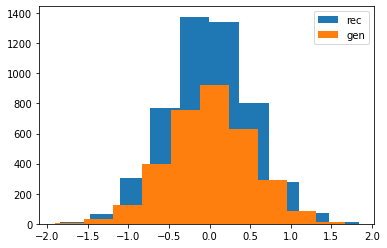

In [18]:
import awkward as ak

for trk_px, trk_imc, mc_trk_px in event.iterate(["trk_px", "trk_imc", "mc_trk_px"], how=tuple):

    plt.hist(ak.flatten(trk_px), label="rec")
    plt.hist(ak.flatten(mc_trk_px), label="gen")
    plt.legend()

    break

**Exercise**: Histograms difficult to compare, since binning not the same, use same binning

## Accelerate Python code with Numba

* Just-In-Time compiler for scientific Python code
* Works on functions
* Very powerful and very fast code
* Numba likes element-wise iteration over arrays
* Not all Python code supported
* Only use really needed!

In [19]:
import numba as nb
print(f"numba {nb.__version__}")

numba 0.55.1


In [20]:
# We make a simple stopwatch to measure performance
# (in general %%timeit magic command is better)

import time
from contextlib import contextmanager

@contextmanager
def stopwatch():
    start = time.monotonic()
    yield
    print(f"{time.monotonic() - start:.2f} sec")

In [21]:
# let's subtract reconstructed from true momentum (this is slow)

with stopwatch():
    delta_px = []
    for trk_px, trk_imc, mc_trk_px in event.iterate(["trk_px", "trk_imc", "mc_trk_px"], how=tuple):    
        for px, imc, mc_px in zip(trk_px, trk_imc, mc_trk_px):
            # select only tracks with associated true particle
            mask = imc >= 0
            px = px[mask]
            mc_px = mc_px[imc[mask]]
            d = np.asarray(px - mc_px) # conversion to numpy needed
            delta_px = np.append(delta_px, d)

1.51 sec


In [22]:
@nb.njit
def calc(px_all, imc_all, mc_px_all):
    r = []
    # loop over events
    for px, imc, mc_px in zip(px_all, imc_all, mc_px_all):
        # loop over reconstructed tracks per event
        for pxi, imci in zip(px, imc):
            if imci < 0:
                continue
            mc_pxi = mc_px[imci]
            r.append(pxi - mc_pxi)
    return r

with stopwatch():
    delta_px = []
    for args in event.iterate(["trk_px", "trk_imc", "mc_trk_px"], how=tuple):
        d = calc(*args)
        delta_px = np.append(delta_px, d)

0.43 sec


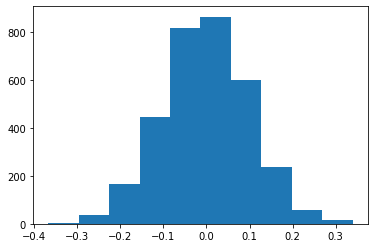

In [49]:
import matplotlib.pyplot as plt

plt.hist(delta_px);

* Created array `delta_px` could still become very large in memory
* Histogram has small memory footprint
* For making histogram, array only temporarily needed
* Idea: Create histogram object first and then fill iteratively with smaller arrays

<img src="https://raw.githubusercontent.com/scikit-hep/boost-histogram/develop/docs/_images/BoostHistogramPythonLogo.png" width=25%/>

* Python frontend to Boost.Histogram library in C++ from the Boost project
* Very fast and flexible
* Multi-dimensional histograms and binned statistics
* Supports weighted and unweighted data
* And much much more, see docs

In [25]:
import boost_histogram as bh
print(f"boost-histogram {bh.__version__}")

boost-histogram 1.3.1


In [50]:
# make an axis
xaxis = bh.axis.Regular(20, -2, 2)

# easy to make several histograms with same binning by reusing axis
h_px = bh.Histogram(xaxis)
h_mc_px = bh.Histogram(xaxis)

# let's use a finer binning for this one
h_delta_px = bh.Histogram(bh.axis.Regular(100, -2, 2))

In [51]:
with stopwatch():
    for trk_px, trk_imc, mc_trk_px in event.iterate(["trk_px", "trk_imc", "mc_trk_px"], how=tuple):
        h_px.fill(ak.flatten(trk_px))
        h_mc_px.fill(ak.flatten(mc_trk_px))

        delta_px = calc(trk_px, trk_imc, mc_trk_px)
        h_delta_px.fill(delta_px)

0.01 sec


In [52]:
h_px

Histogram(Regular(20, -2, 2), storage=Double()) # Sum: 5032.0

In [53]:
h_delta_px

Histogram(Regular(100, -2, 2), storage=Double()) # Sum: 3240.0

In [54]:
print(h_px)

                 ┌───────────────────────────────────────────────────────────┐
[-inf,   -2) 0   │                                                           │
[  -2, -1.8) 1   │▏                                                          │
[-1.8, -1.6) 3   │▎                                                          │
[-1.6, -1.4) 17  │█▎                                                         │
[-1.4, -1.2) 25  │█▊                                                         │
[-1.2,   -1) 78  │█████▌                                                     │
[  -1, -0.8) 181 │████████████▉                                              │
[-0.8, -0.6) 308 │█████████████████████▊                                     │
[-0.6, -0.4) 453 │████████████████████████████████▏                          │
[-0.4, -0.2) 647 │█████████████████████████████████████████████▉             │
[-0.2,    0) 819 │██████████████████████████████████████████████████████████ │
[   0,  0.2) 782 │██████████████████████████████████

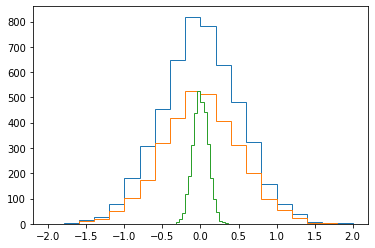

In [55]:
# matplotlib supports plotting of histograms with plt.stairs

for h in (h_px, h_mc_px, h_delta_px):
    plt.stairs(h.values(), h.axes.edges[0])

**Exercise**
* Draw color-filled histograms transparently on top of each other
* Add labels to each histogram and a legend 

In [ ]:
# do exercise here

* Histograms can be reduced
* Shrink axis range
* Make binning coarser

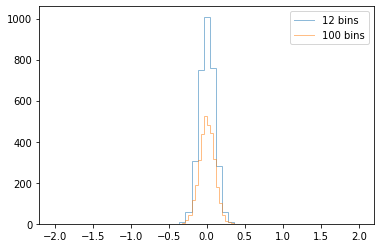

In [33]:
# make histogram coarser with `rebin` and shrink range with `loc`, using an extended slicing syntax
from boost_histogram.tag import loc, rebin

h_delta_px_2 = h_delta_px[loc(-0.5):loc(0.5):rebin(2)]

for i, h in enumerate((h_delta_px_2, h_delta_px)):
    plt.stairs(h.values(), h.axes[0].edges, facecolor=f"C{i}", label=f"{len(h.values())} bins", alpha=0.5)
plt.legend();

boost-histogram
* Supports advanced axis types (e.g. category axis)
* Supports higher dimensional histograms
* Supports generalized histograms with binned statistics (aka "profile" in ROOT)

In [34]:
# check detector momentum resolution in x for different particle species

p_axis = bh.axis.Regular(50, -2, 2)
pid_axis = bh.axis.IntCategory([], growth=True)

# profile: compute mean of reconstructed px in bins of mc_px for different particle species
p_2d = bh.Histogram(p_axis, pid_axis, storage=bh.storage.Mean())

for px_all, imc_all, mc_px_all, mc_pid_all in event.iterate(
        ["trk_px", "trk_imc", "mc_trk_px", "mc_trk_pid"], how=tuple):

    for px, imc, mc_px, mc_pid in zip(px_all, imc_all, mc_px_all, mc_pid_all):
        # select only tracks with associated true particle
        mask = imc >= 0
        px = px[mask]
        associated = imc[mask]
        mc_px = mc_px[associated]
        mc_pid = mc_pid[associated]

        p_2d.fill(mc_px, mc_pid, sample=px)

* We use `particle` library to look-up properties of particles based on their particle ID
* Get name, mass, life-time, quark content, ...

In [35]:
import particle
print(f"particle {particle.__version__}")

particle 0.16.3


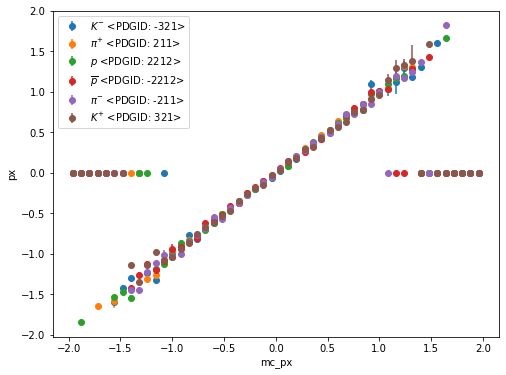

In [36]:
plt.figure(figsize=(8, 6))

pids = p_2d.axes[1]
for i, pid in enumerate(pids):
    part = particle.Particle.from_pdgid(pid)

    x = p_2d.axes[0].centers
    y = p_2d.values()[:, i]
    ye = p_2d.variances()[..., i] ** 0.5
    plt.errorbar(x, y, ye, fmt="o", label=f"${part.latex_name}$ {part.pdgid}")

plt.xlabel("mc_px")
plt.ylabel("px")
plt.legend();

**Exercise**
* Only show bins with sufficient entries
* Use `p_2d.counts()`

* We find that the reconstruction resolution is the same for all particle species
* Which means we can remove this axis by "summing" over its content

In [57]:
p_1d = p_2d[:, sum] # remove PID axis by "summing"

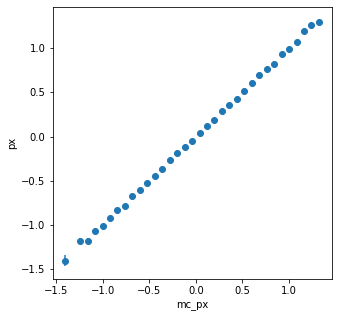

In [58]:
plt.figure(figsize=(5, 5))

x = p_1d.axes[0].centers
c = p_1d.counts()
y = p_1d.values()
ye = p_1d.variances() ** 0.5
m = c > 5
plt.errorbar(x[m], y[m], ye[m], fmt="o")

plt.xlabel("mc_px")
plt.ylabel("px");

## Fits

* Typical analysis work flow (often automated with Snakemake)
    1. Pre-select data
    2. Make histograms and profiles from pre-selected  data
    3. Fit histograms and profiles to extract physical parameters
* Many specialized fitting tools for individual purposes, e.g.: [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit)

* Generic methods
    - [RooFit](https://root.cern.ch/roofit)
    - [iminuit](https://github.com/scikit-hep/iminuit)

* RooFit
    * Requires ROOT to be installed
    * Very powerful and fast
    * You may encounter bugs
    * Not well documented
    * Difficult to hack and extend
    * Mainstream
    
    
* iminuit
    * Only uses MINUIT C++ code from ROOT
    * Very flexible and as fast as you can make it
    * Fairly bug-free
    * Well documented
    * Easy to hack and extend
    * Used by many people, but not mainstream


<img src="https://raw.githubusercontent.com/scikit-hep/iminuit/develop/doc/_static/iminuit_logo.svg" width=25%/>

* Python frontend to Minuit2 C++ library maintained by ROOT team at CERN 
    * Minuit2 also powers RooFit
* Least-squares fits and maximum-likelihood fits with error estimation
* Easy to use for beginners, flexible for power-users
* Comes with builtin cost functions for common fits
* Large number of tutorials
* Developed and maintained by Hans, who is a statistics power user


In [39]:
import iminuit
from iminuit import Minuit

print(f"iminuit {iminuit.__version__}")

iminuit 2.10.0


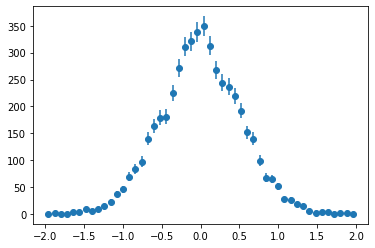

In [40]:
# draw data we want to fit
plt.errorbar(h_px.axes[0].centers,
             h_px.values(),
             h_px.variances()**0.5,
             fmt="o");

Let's fit the px distribution with a normal distribution to extract the parameters $\mu$ and $\sigma$.

- To apply maximum-likelihood method, we need a statistical model that describes the data
- Assumption 1: original data is normal distributed; pdf is $\mathcal{N}(\mu, \sigma)$ with parameters $\mu$ and $\sigma$
- Assumption 2: counts in histogram are Poisson distributed

In [59]:
from matplotlib.ticker import LogLocator
from iminuit.cost import BinnedNLL  # cost function for histograms

# scipy has many statistical distributions
from scipy.stats import norm 


def model_cdf(x, mu, sigma):
    return norm(mu, sigma).cdf(x)

 
cost = BinnedNLL(h_px, h_px.axes[0].edges, model_cdf)

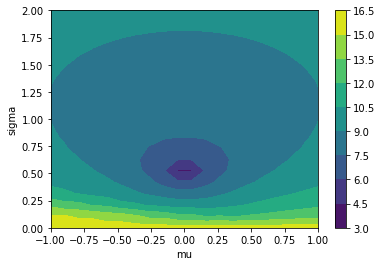

In [60]:
# plot cost function
mus = np.linspace(-1, 1, 20)
sigmas = np.linspace(1e-10, 2, 20)

# quick way to get Z_ij matrix for X_i, Y_j grid
X, Y = np.meshgrid(mus, sigmas)
Z = np.vectorize(cost)(X, Y)

plt.contourf(X, Y, Z)
plt.xlabel("mu")
plt.ylabel("sigma")
plt.colorbar();

**Exercise**

* Scale is too large to see minimum, make z-axis logarithmic
* Replace "mu" and "sigma" axis labels with greek letters

* You can write your own cost function
    * It is not hard
    * iminuit was designed to work well with user-defined cost functions
* But use the ones from iminuit unless you really need something different
    * iminuit's cost functions have lots of cool features
    * Are continuously improved
    * Are extensively unit-tested

* Minuit finds this minimum, even in high-dimensional spaces
* Analyses cost function around minimum to estimate parameter uncertainties

In [44]:
m = Minuit(cost, mu=0, sigma=1)
m.limits["sigma"] = (0, None)  # sigma must not be negative
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 52.3 (chi2/ndof = 1.1)     │              Nfcn = 45               │
│ EDM = 4.42e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  -0.002   │   0.007   │            │            │         │         │       │
│ 1 │ sigma │   0.510   │   0.005   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │ 5.18e-05 1.29e-09 │
│ sigma │ 1.29e-09 2.59e-05 │
└───────┴───────────────────┘

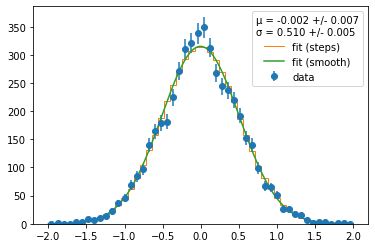

In [45]:
ax = h_px.axes[0]

plt.errorbar(ax.centers,
             h_px.values(),
             h_px.variances()**0.5,
             fmt="o",
             label="data")

# draw model as used in the fit
plt.stairs(np.diff(model_cdf(ax.edges, *m.values)) * h_px.sum(),
           ax.edges,
           label="fit (steps)")
 
# alternative: draw model as pdf (smooth)
xm = np.linspace(ax.edges[0], ax.edges[-1], 1000)
plt.plot(xm,
         norm(*m.values).pdf(xm) * h_px.sum() * ax.widths[0],
         label="fit (smooth)")

plt.legend(title=(f"µ = {m.values['mu']:.3f} +/- {m.errors['mu']:.3f}\n"
                  f"σ = {m.values['sigma']:.3f} +/- {m.errors['sigma']:.3f}"));

Check whether the fit is good
- By looking at *pull distribution*
    - Compute (data - model) / error for each bin
- By checking the $\chi^2$ value against the degrees of freedom
    - Simple check: $\chi^2/n_\text{dof}$ should be about 1
    - Better check: p-value $= \int_{\chi^2_\text{observed}}^{\infty} P(\chi^2; n_\text{dof}) \, \text{d}\chi^2$ to obtain a higher value than the observed (chance probability)
        - If very small (< 1%), model is not good or errors are underestimated


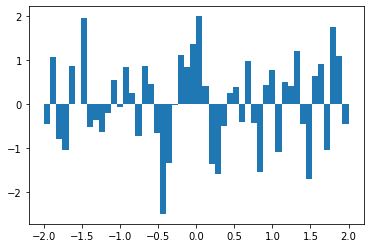

In [46]:
# pull distribution

ax = h_px.axes[0]

n_total = h_px.sum()
n_data = h_px.values()
n_model = np.diff(model_cdf(ax.edges, *m.values)) * n_total
n_error = n_model ** 0.5 # for Poisson-distributed data

pull = (n_data - n_model) / n_error

plt.stairs(pull, ax.edges, fill=True);

In [47]:
# p-value

# degrees of freedom: number of fitted bins minus number of fitted parameters
ndof = len(h_px.values()) - m.nfit

chi2_obs = np.sum(pull ** 2)

print(f"chi2/ndof = {chi2_obs:.1f} / {ndof} = {chi2_obs / ndof:.1f}")

from scipy.stats import chi2

p_value = 1 - chi2(ndof).cdf(chi2_obs)

print(f"p-value {p_value:.2}")

chi2/ndof = 49.6 / 48 = 1.0
p-value 0.41
